# Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
train = pd.read_csv("train.csv")
train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [3]:
train.shape 

(992931, 2)

In [4]:
train["is_churn"].value_counts()

0    929460
1     63471
Name: is_churn, dtype: int64

In [5]:
mem = pd.read_csv("members_v3.csv")
mem.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [6]:
mem.shape

(6769473, 6)

In [7]:
mem.dropna(inplace=True)

In [8]:
mem.shape

(2339968, 6)

In [9]:
len(set(mem["msno"]))

2339968

In [10]:
trans = pd.read_csv("transactions.csv")
trans.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [11]:
trans.shape

(21547746, 9)

In [12]:
len(set(trans["msno"]))

2363626

In [13]:
#logs = pd.read_csv("user_logs.csv")

In [14]:
#print(logs.shape)
#logs.head()

In [20]:
set1 = pd.merge(train,mem,on="msno",how="left")
set2 = pd.merge(set1,trans,on="msno",how="left")
#set3 = pd.merge(set2,logs,on="msno",how="left")

In [16]:
set2.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0,38,7,0,0,0,20161031,20161107,0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0,38,30,149,149,0,20170107,20170206,0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,39,30,149,149,1,20161031,20161221,0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,39,30,149,149,1,20160715,20160821,0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,39,30,149,149,1,20160831,20161021,0


In [17]:
set2.dtypes

msno                       object
is_churn                    int64
city                      float64
bd                        float64
gender                     object
registered_via            float64
registration_init_time    float64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
id = set2[["msno"]]
set2.drop("msno",axis=1,inplace=True)
for i in set2.columns:
    if type(set2[i][0]) == str:
        set2[i] = lb.fit_transform(set2[i])


In [22]:
set2.head()

,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,1,18.0,36.0,0,9.0,20050406.0,38,7,0,0,0,20161031,20161107,0
1,1,18.0,36.0,0,9.0,20050406.0,38,30,149,149,0,20170107,20170206,0
2,1,10.0,38.0,1,9.0,20050407.0,39,30,149,149,1,20161031,20161221,0
3,1,10.0,38.0,1,9.0,20050407.0,39,30,149,149,1,20160715,20160821,0
4,1,10.0,38.0,1,9.0,20050407.0,39,30,149,149,1,20160831,20161021,0


In [27]:
set2 = set2.dropna()

In [28]:
from sklearn.preprocessing import StandardScaler as ss
s = ss()
s.fit(set2)
set3 = s.transform(set2)

In [29]:
set3

array([[ 4.30054477,  1.22646069,  0.27691514, ...,  0.5401221 ,
         0.32786463, -0.13820283],
       [ 4.30054477,  1.22646069,  0.27691514, ...,  1.98688192,
         1.60083949, -0.13820283],
       [ 4.30054477, -0.14991031,  0.37307097, ...,  0.5401221 ,
         0.34381354, -0.13820283],
       ...,
       [-0.23252868,  0.19418244, -0.30001982, ...,  2.00616993,
         1.61832733, -0.13820283],
       [-0.23252868,  0.19418244, -0.30001982, ...,  2.001866  ,
         1.60391735, -0.13820283],
       [-0.23252868,  0.71032157, -0.63656521, ...,  2.00473529,
         1.60307793, -0.13820283]])

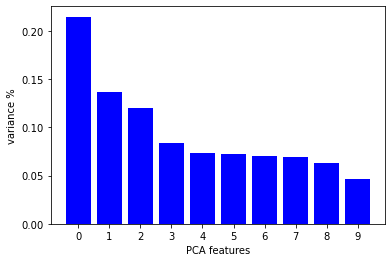

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(set3)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()
# Save components to a DataFrame
set4 = pd.DataFrame(principalComponents)

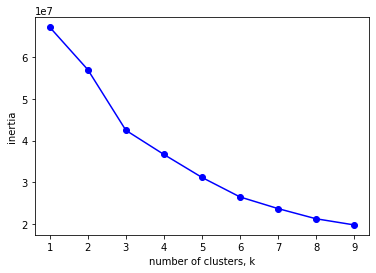

In [31]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(set4.iloc[:,:6])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [33]:
model = KMeans(n_clusters=4)
y = model.fit_predict(set4.iloc[:,:6])
labels = model.predict(set4.iloc[:,:6])

In [37]:
set5 = set2.copy()
set5["Cluster"] = labels


# Clusters-Segmented DataBase

In [38]:
set5.insert(0,"msno",id)
set5.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,Cluster
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,0,9.0,20050406.0,38,7,0,0,0,20161031,20161107,0,0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,0,9.0,20050406.0,38,30,149,149,0,20170107,20170206,0,0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1,9.0,20050407.0,39,30,149,149,1,20161031,20161221,0,0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1,9.0,20050407.0,39,30,149,149,1,20160715,20160821,0,0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1,9.0,20050407.0,39,30,149,149,1,20160831,20161021,0,0


# Classification

<AxesSubplot:>

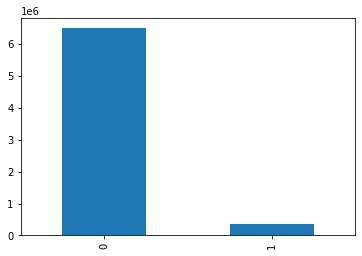

In [39]:
set6 = set2.copy()
set6["is_churn"].value_counts().plot(kind="bar")

<AxesSubplot:>

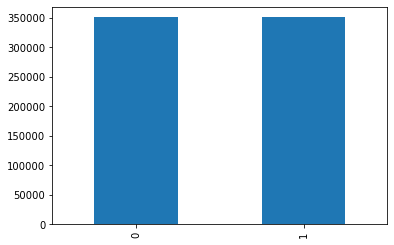

In [41]:
balanced = set6[set6["is_churn"]==1]
b2 = set6[set6["is_churn"]==0]
b21 = b2.sample(n=len(balanced))
balanced = balanced.append(b21)
balanced = balanced.reset_index(drop=True)
balanced["is_churn"].value_counts().plot(kind="bar")

In [42]:
len(balanced)

702022

In [43]:
x = balanced.drop("is_churn",axis=1)
y = balanced["is_churn"]

In [44]:
x.corr()

,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
city,1.000000,0.018441,0.009641,0.048182,-0.059740,-0.017725,-0.004564,-0.005275,-0.002035,0.038603,-0.021497,-0.020839,0.002929
bd,0.018441,1.000000,-0.016128,0.098231,-0.132861,-0.008137,-0.004570,-0.007468,-0.000411,0.151825,-0.025960,-0.020817,0.002188
gender,0.009641,-0.016128,1.000000,-0.030908,0.022158,-0.034458,-0.008448,-0.008935,-0.006640,-0.026634,0.009176,0.006227,-0.002608
registered_via,0.048182,0.098231,-0.030908,1.000000,-0.540206,-0.032208,-0.017329,-0.025427,-0.007480,0.237327,-0.086587,-0.075010,0.002646
registration_init_time,-0.059740,-0.132861,0.022158,-0.540206,1.000000,0.152857,0.037351,0.032468,0.000171,-0.253462,0.123753,0.112345,0.011954
payment_method_id,-0.017725,-0.008137,-0.034458,-0.032208,0.152857,1.000000,-0.199384,-0.191334,-0.228620,0.225074,-0.083293,-0.070252,0.035272
payment_plan_days,-0.004564,-0.004570,-0.008448,-0.017329,0.037351,-0.199384,1.000000,0.970517,0.946482,-0.233003,-0.000382,0.153136,-0.019055
plan_list_price,-0.005275,-0.007468,-0.008935,-0.025427,0.032468,-0.191334,0.970517,1.000000,0.970387,-0.235031,0.008109,0.167986,-0.014557
actual_amount_paid,-0.002035,-0.000411,-0.006640,-0.007480,0.000171,-0.228620,0.946482,0.970387,1.000000,-0.225289,-0.045077,0.121186,-0.023744
is_auto_renew,0.038603,0.151825,-0.026634,0.237327,-0.253462,0.225074,-0.233003,-0.235031,-0.225289,1.000000,-0.078058,-0.088304,0.111333


### None of the values show any major correlation

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Using Random Forest for classification

In [53]:

from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import GridSearchCV
rf = rf()
hyperparameters = {'max_depth':[2,5,10,20],'n_estimators':[10,30,100]}
clf = GridSearchCV(rf, param_grid=hyperparameters, scoring='f1')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as asc

In [55]:
cm = confusion_matrix(y_test, y_pred)
#Printing accuracy
print(f"Accuracy: {asc(y_pred, y_test)}")
print(("Confusion Matrix:"))
print(cm)

Accuracy: 0.7394388600568832
Confusion Matrix:
[[89586 15792]
 [39084 66145]]


In [58]:
from sklearn.ensemble import RandomForestClassifier as rf
clf1 = rf(random_state=0)
clf1.fit(x_train,y_train)
ypred2 = clf1.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
#Printing accuracy
print(f"Accuracy: {asc(y_pred2, y_test)}")
print(("Confusion Matrix:"))
print(cm)